# Desafio Indicium IMDB

# Introdução

**Arthur Silva Ferreira Coelho**

---

Variáveis

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas 
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando o dataset

In [20]:
df = pd.read_csv('datasets/desafio_indicium_imdb.csv')
df.shape

(999, 16)

In [21]:
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",9,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Como o dataset já é bem pequeno, não há necessidade de fazer um sample.

## Limpando o dataset

In [22]:
df.dtypes, df.columns, df.dtypes.unique()

(Unnamed: 0         int64
 Series_Title      object
 Released_Year     object
 Certificate       object
 Runtime           object
 Genre             object
 IMDB_Rating      float64
 Overview          object
 Meta_score       float64
 Director          object
 Star1             object
 Star2             object
 Star3             object
 Star4             object
 No_of_Votes        int64
 Gross             object
 dtype: object,
 Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
        'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
        'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object))

Released_year, Runtime e Gross são variáveis numéricas, mas estão como objetos.

In [23]:
df["Released_Year"].isnull().sum(),
df["Released_Year"].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Tem um ano "PG". provavelmente foi erro de digitação. não posso supor de que ano o filme é, por isso, vou remover esse dado da tabela.

In [24]:
problematic_values = ['PG']
df = df[df['Released_Year'] != 'PG']

In [25]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace('$', '').str.replace(',', '').astype(float)
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [26]:
pd.set_option('display.float_format', lambda x: f"{x:,.0f}" if pd.notna(x) else "NaN")

Há uma coluna "Unnamed' que parece ser o index das linhas

In [27]:
df = df.drop('Unnamed: 0', axis=1)

In [28]:
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96,"Crime, Drama",9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",9,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [29]:
df.shape

(998, 15)

Ótimo, de (999,16) foi para (998,15), o que significa que removemos com sucesso apenas aquela linha com 'PG' e agora temos dados numéricos com dtypes apropriados assim como a remoção da coluna Unnamed, que nçao tinha valor para nossa análise.

# Análise Exploratória

In [30]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998,998,998,841,998,829
mean,"1,991",123,8,78,"271,624","67,955,004"
std,23,28,0,12,"321,074","109,812,283"
min,"1,920",45,8,28,"25,088","1,305"
25%,"1,976",103,8,70,"55,417","3,237,118"
50%,"1,999",119,8,79,"138,168","23,383,987"
75%,"2,009",137,8,87,"373,506","80,500,000"
max,"2,020",321,9,100,"2,303,232","936,662,225"


## Valores faltantes

In [31]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [33]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
            'Valores faltantes': missing_data,
            'Porcentagem': missing_percent})
print(missing_df[missing_df['Valores faltantes'] > 0])

             Valores faltantes  Porcentagem
Certificate                101           10
Meta_score                 157           16
Gross                      169           17


A porcentagem de valores faltantes em meta_score e certificate é bem baixa. Quanto a gross, não posso presumir ou supor o faturamento de cada filme com essa informação faltante.

## Analisando a distribuição dos dados

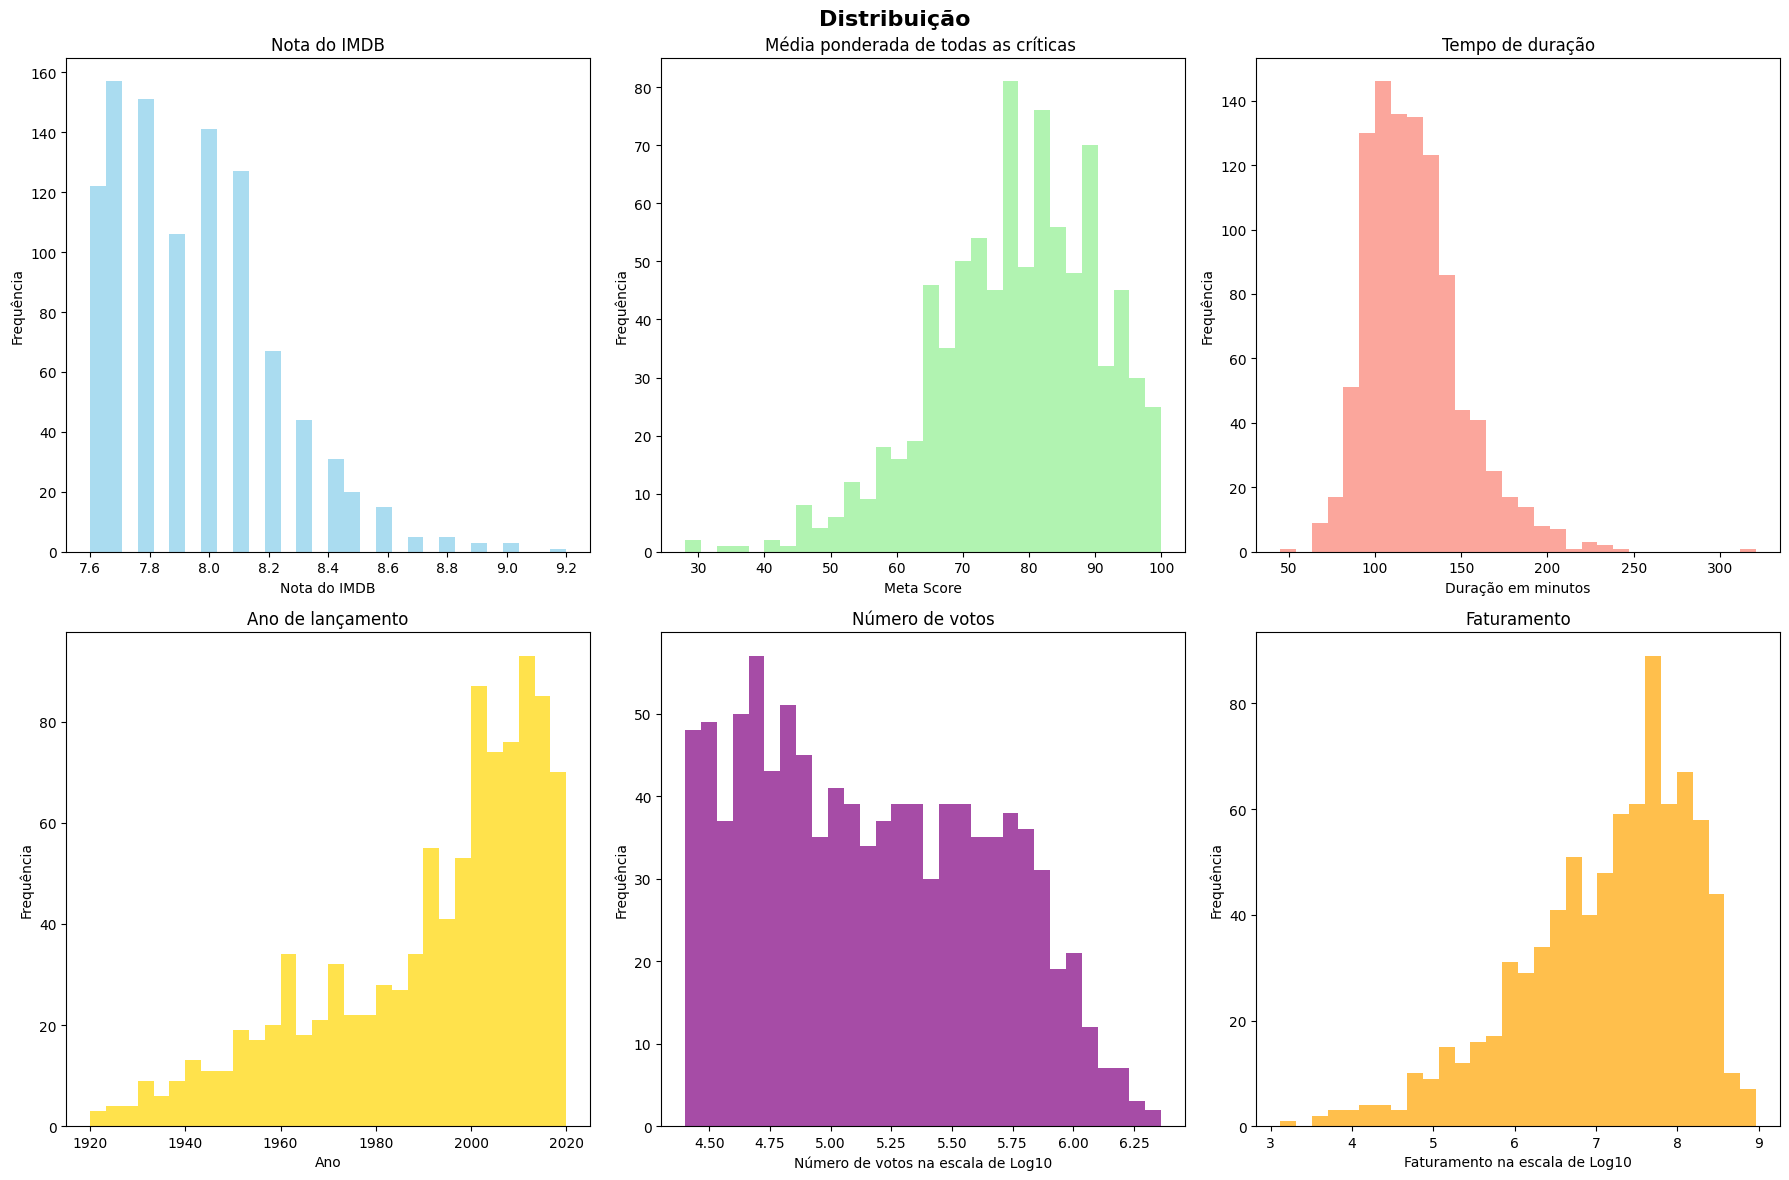

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuição', fontsize=16, fontweight='bold')
        
# IMDB Rating distribution
axes[0, 0].hist(df['IMDB_Rating'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Nota do IMDB')
axes[0, 0].set_xlabel('Nota do IMDB')
axes[0, 0].set_ylabel('Frequência')

# Meta Score distribution
axes[0, 1].hist(df['Meta_score'].dropna(), bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Média ponderada de todas as críticas ')
axes[0, 1].set_xlabel('Meta Score')
axes[0, 1].set_ylabel('Frequência')

# Runtime distribution
axes[0, 2].hist(df['Runtime'].dropna(), bins=30, alpha=0.7, color='salmon')
axes[0, 2].set_title('Tempo de duração')
axes[0, 2].set_xlabel('Duração em minutos')
axes[0, 2].set_ylabel('Frequência')
        
# Released Year distribution
axes[1, 0].hist(df['Released_Year'].dropna(), bins=30, alpha=0.7, color='gold')
axes[1, 0].set_title('Ano de lançamento')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Frequência')
        
# Number of Votes distribution (log scale)
axes[1, 1].hist(np.log10(df['No_of_Votes'].dropna()), bins=30, alpha=0.7, color='purple')
axes[1, 1].set_title('Número de votos')
axes[1, 1].set_xlabel('Número de votos na escala de Log10')
axes[1, 1].set_ylabel('Frequência')
        
# Gross distribution (log scale)
axes[1, 2].hist(np.log10(df['Gross'].dropna()), bins=30, alpha=0.7, color='orange')
axes[1, 2].set_title('Faturamento')
axes[1, 2].set_xlabel('Faturamento na escala de Log10')
axes[1, 2].set_ylabel('Frequência')
        
plt.tight_layout()
plt.show()

## Correlações

Vou agora analisar a correlação entre as variáveis numéricas

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("As variáveis numéricas são: \n\n", numerical_columns)

As variáveis numéricas são: 

 Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


<Axes: >

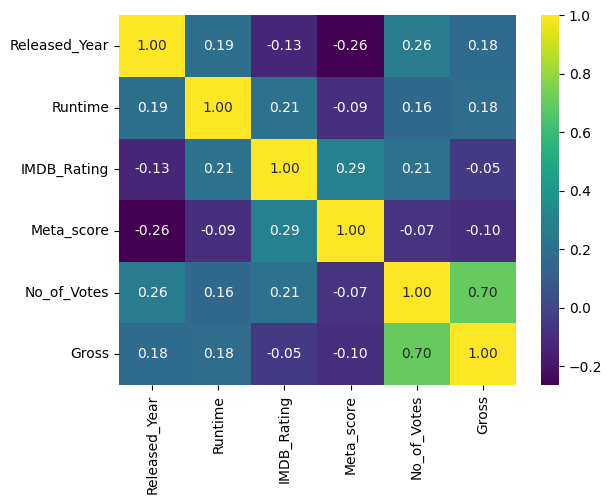

In [ ]:
corr = df.select_dtypes(include=['int64', 'float64']).corr(method='spearman', min_periods=1)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')